**Contexte :**

La plateforme Olist a besoin d'effectuer une segmentation de ses clients. Il s'agit de classer les clients grâce à deux types de caractéristiques :
- leurs comportements
- leurs données personnelles (anonymisées)
Cette segmentation doit pouvoir être utilisable par leur équipe marketing afin d'optimiser les campagnes marketing.

Après la préparation et l'exploration des données, des méthodes de classifications non-supervisées seront employées pour regrouper les clients ayant un profil de consommateur similaire. 

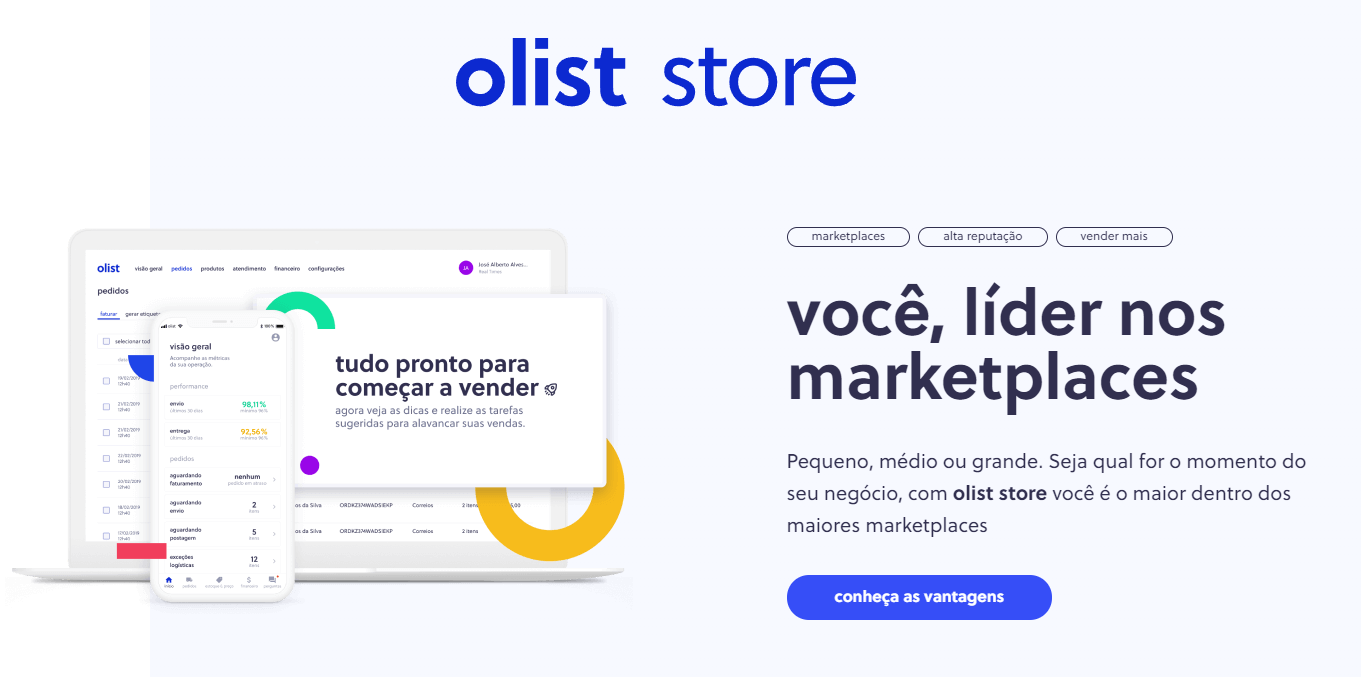

# Préparation des données

## Chargement des librairies utiles à l'étude

In [1]:
# numpy and pandas pour la manipulation des données
import numpy as np
import pandas as pd

# matplotlib and seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importe mes fonctions personnalisées utiles pour ce projet
from my_functions import *

# Importe mes couleurs
a, b, c, d, e = [plt.cm.Blues, plt.cm.Oranges,
                 plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

## Chargement des données

In [3]:
# Liste des fichiers transmis par Olist
print(os.listdir(chemin))

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


### La base de données *olist_customers_dataset* : les clients

In [4]:
# olist_customers_dataset
clients = pd.read_csv(chemin + "olist_customers_dataset.csv")
clients.head(2)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP

In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


La variable "customer_zip_code_prefix" est une variable quantitative mais elle représente le code postal du client, c'est une information qualitative et non quantitative.

Cette base de données contient les informations de 99441 commandes. Elle donne deux codes par client "customer_id" et "customer_unique_id". Elle donne aussi la localisation du client via son code postal, sa ville et l'état d'où il commande.

A chaque commande, un code "customer_id" est créée. Ce code est plutôt un numéro de commande qu'un code client.

Chaque client possède un code unique, le code 'customer_unique_id'. C'est ce code qui nous permettra de retrouver un client dans les autres bases de données et parmi les groupes créés lors de la classification non-supervisée.

In [6]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(clients)

Nombre de cellules avec des données manquantes :  0
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  0
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %


Nombre de valeurs manquantes  \
customer_id                                          0   
customer_unique_id                                   0   
customer_zip_code_prefix                             0   
customer_city                                        0   
customer_state                                       0   

                          Taux de valeurs manquantes  
customer_id                                      0.0  
customer_unique_id                               0.0  
customer_zip_code_prefix                         0.0  
customer_city                                    0.0  
customer_state                                   0.0

Il n'y a pas de valeurs manquantes dans cette base de données.

### La base de données *olist_geolocation_dataset* : les géolocalisations

In [7]:
# olist_geolocation_dataset
geoloc = pd.read_csv(chemin + "olist_geolocation_dataset.csv")
geoloc.head(2)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP

In [8]:
geoloc.describe()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

Il y a davantage de précision pour le code postal que pour la ville. En effet, des mégalopoles comme Sao Paulo sont divisées en plusieurs codes postaux. Pour localiser les clients, il sera plus précis de leur attribuer des coordonnées en correspondance avec le code postal. 

In [9]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(geoloc)

Nombre de cellules avec des données manquantes :  0
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  0
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %


Nombre de valeurs manquantes  \
geolocation_zip_code_prefix                             0   
geolocation_lat                                         0   
geolocation_lng                                         0   
geolocation_city                                        0   
geolocation_state                                       0   

                             Taux de valeurs manquantes  
geolocation_zip_code_prefix                         0.0  
geolocation_lat                                     0.0  
geolocation_lng                                     0.0  
geolocation_city                                    0.0  
geolocation_state                                   0.0

Il n'y a pas de valeurs manquantes dans cette base de données.

### La base de données *olist_orders_dataset* : les commandes

In [10]:
# olist_orders_dataset
commandes = pd.read_csv(chemin + "olist_orders_dataset.csv")
commandes.head(2)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00

In [11]:
commandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Nous retrouvons ici le même nombre d'entrées que pour la base de données clients. Cette base de données pourra être fusionnée avec la base de données clients en faisant correspondre la variable 'customer_id'.

In [12]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(commandes)

Nombre de cellules avec des données manquantes :  4908
Pourcentage du nombre de cellules avec des données manquantes :  0.6  %
Nombre de lignes avec au moins une donnée manquante :  2980
Pourcentage de lignes avec au moins une donnée manquante :  3.0  %


Nombre de valeurs manquantes  \
order_delivered_customer_date                          2965   
order_delivered_carrier_date                           1783   
order_approved_at                                       160   
order_id                                                  0   
customer_id                                               0   
order_status                                              0   
order_purchase_timestamp                                  0   
order_estimated_delivery_date                             0   

                               Taux de valeurs manquantes  
order_delivered_customer_date                         3.0  
order_delivered_carrier_date                          1.8  
order_approved_at                                     0.2  
order_id                                              0.0  
customer_id                                           0.0  
order_status                                          0.0  
order_purchase_timestamp                              0.0  
order_estimated_delivery_date                         0.0

Il y a quelques valeurs manquantes dans cette base de données.

### La base de données *olist_order_items_dataset* : les articles

In [13]:
# olist_order_items_dataset
articles = pd.read_csv(chemin + "olist_order_items_dataset.csv")
articles.head(2)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93

Cette base de données répertorie l'intégralité des articles achetés sur le site pour une période donnée. Elle donne le code du produit, le code du vendeur, l'ordre dans la commande, son prix et les frais de port.

In [14]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(articles)

Nombre de cellules avec des données manquantes :  0
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  0
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %


Nombre de valeurs manquantes  Taux de valeurs manquantes
order_id                                        0                         0.0
order_item_id                                   0                         0.0
product_id                                      0                         0.0
seller_id                                       0                         0.0
shipping_limit_date                             0                         0.0
price                                           0                         0.0
freight_value                                   0                         0.0

### La base de données *olist_order_payments_dataset* : les paiements

In [15]:
# olist_order_payments_dataset
paiements = pd.read_csv(chemin + "olist_order_payments_dataset.csv")
paiements.head(2)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39

La base de données paiements donne les types de paiement, le nombre de mensualités et le prix total de la commande.

In [16]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(paiements)

Nombre de cellules avec des données manquantes :  0
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  0
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %


Nombre de valeurs manquantes  Taux de valeurs manquantes
order_id                                         0                         0.0
payment_sequential                               0                         0.0
payment_type                                     0                         0.0
payment_installments                             0                         0.0
payment_value                                    0                         0.0

Il n'y a pas de valeurs manquantes dans cette base de données.

### La base de données *olist_orders_reviews_dataset* : les avis

In [17]:
# olist_order_reviews_dataset
avis = pd.read_csv(chemin + "olist_order_reviews_dataset.csv")
avis.head(2)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13

Cette base de données donne les avis des clients par commande. Elle répertorie le numéro de commande, la note donnée par le client et le message laissé.

In [18]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(avis)

Nombre de cellules avec des données manquantes :  145903
Pourcentage du nombre de cellules avec des données manquantes :  21.0  %
Nombre de lignes avec au moins une donnée manquante :  89385
Pourcentage de lignes avec au moins une donnée manquante :  90.1  %


Nombre de valeurs manquantes  \
review_comment_title                            87656   
review_comment_message                          58247   
review_id                                           0   
order_id                                            0   
review_score                                        0   
review_creation_date                                0   
review_answer_timestamp                             0   

                         Taux de valeurs manquantes  
review_comment_title                           88.3  
review_comment_message                         58.7  
review_id                                       0.0  
order_id                                        0.0  
review_score                                    0.0  
review_creation_date                            0.0  
review_answer_timestamp                         0.0

Il y a quelques valeurs manquantes dans cette base de données.

### La base de données *olist_products_dataset* : les produits

In [19]:
# olist_products_dataset
produits = pd.read_csv(chemin + "olist_products_dataset.csv")
produits.head(2)

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0

Cette base de données donne des informations sur les produits comme leur taille, leur poids et leur catégorie.

In [20]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(produits)

Nombre de cellules avec des données manquantes :  2448
Pourcentage du nombre de cellules avec des données manquantes :  0.8  %
Nombre de lignes avec au moins une donnée manquante :  611
Pourcentage de lignes avec au moins une donnée manquante :  1.9  %


Nombre de valeurs manquantes  \
product_category_name                                610   
product_name_lenght                                  610   
product_description_lenght                           610   
product_photos_qty                                   610   
product_id                                             0   
product_weight_g                                       2   
product_length_cm                                      2   
product_height_cm                                      2   
product_width_cm                                       2   

                            Taux de valeurs manquantes  
product_category_name                              1.9  
product_name_lenght                                1.9  
product_description_lenght                         1.9  
product_photos_qty                                 1.9  
product_id                                         0.0  
product_weight_g                                   0.0  
product_length_cm                                  0.0  
product_height_cm                                  0.0  
product_width_cm                                   0.0

Il y a quelques valeurs manquantes dans cette base de données.

### La base de données *product_category_name_translation* : les catégories

In [21]:
# olist_product_category_name_translation_dataset
categories_en = pd.read_csv(chemin + "product_category_name_translation.csv")
categories_en.head(2)

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories

Cette base de données donne les catégories de produits traduites en anglais. Elle sera utile à tout utilisateur non lusophone pour pouvoir créer des catégories plus large pour faciliter l'étape de classification.

In [22]:
# Cette fonction permet de quantifier les valeurs manquantes d'une BdD
quantifier_val_manq(categories_en)

Nombre de cellules avec des données manquantes :  0
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  0
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %


Nombre de valeurs manquantes  \
product_category_name                                     0   
product_category_name_english                             0   

                               Taux de valeurs manquantes  
product_category_name                                 0.0  
product_category_name_english                         0.0

Il n'y a pas de valeurs manquantes dans cette base de données.

## Assemblage des bases de données et visualisations

L'objectif de ce travail est d'une part de visualiser les données afin d'en apprécier les informations que les différentes bases de données nous donnent. Ensuite, il s'agit d'assembler les différentes bases de données pour obtenir une base de données finale qui illustre le comportement de chaque client. Tout au long de ces deux étapes, les variables non pertinentes seront écartées et de nouvelles variables seront créées.

Les bases de données sont reliées entre elles suivant le schéma ci-dessous :

<div>
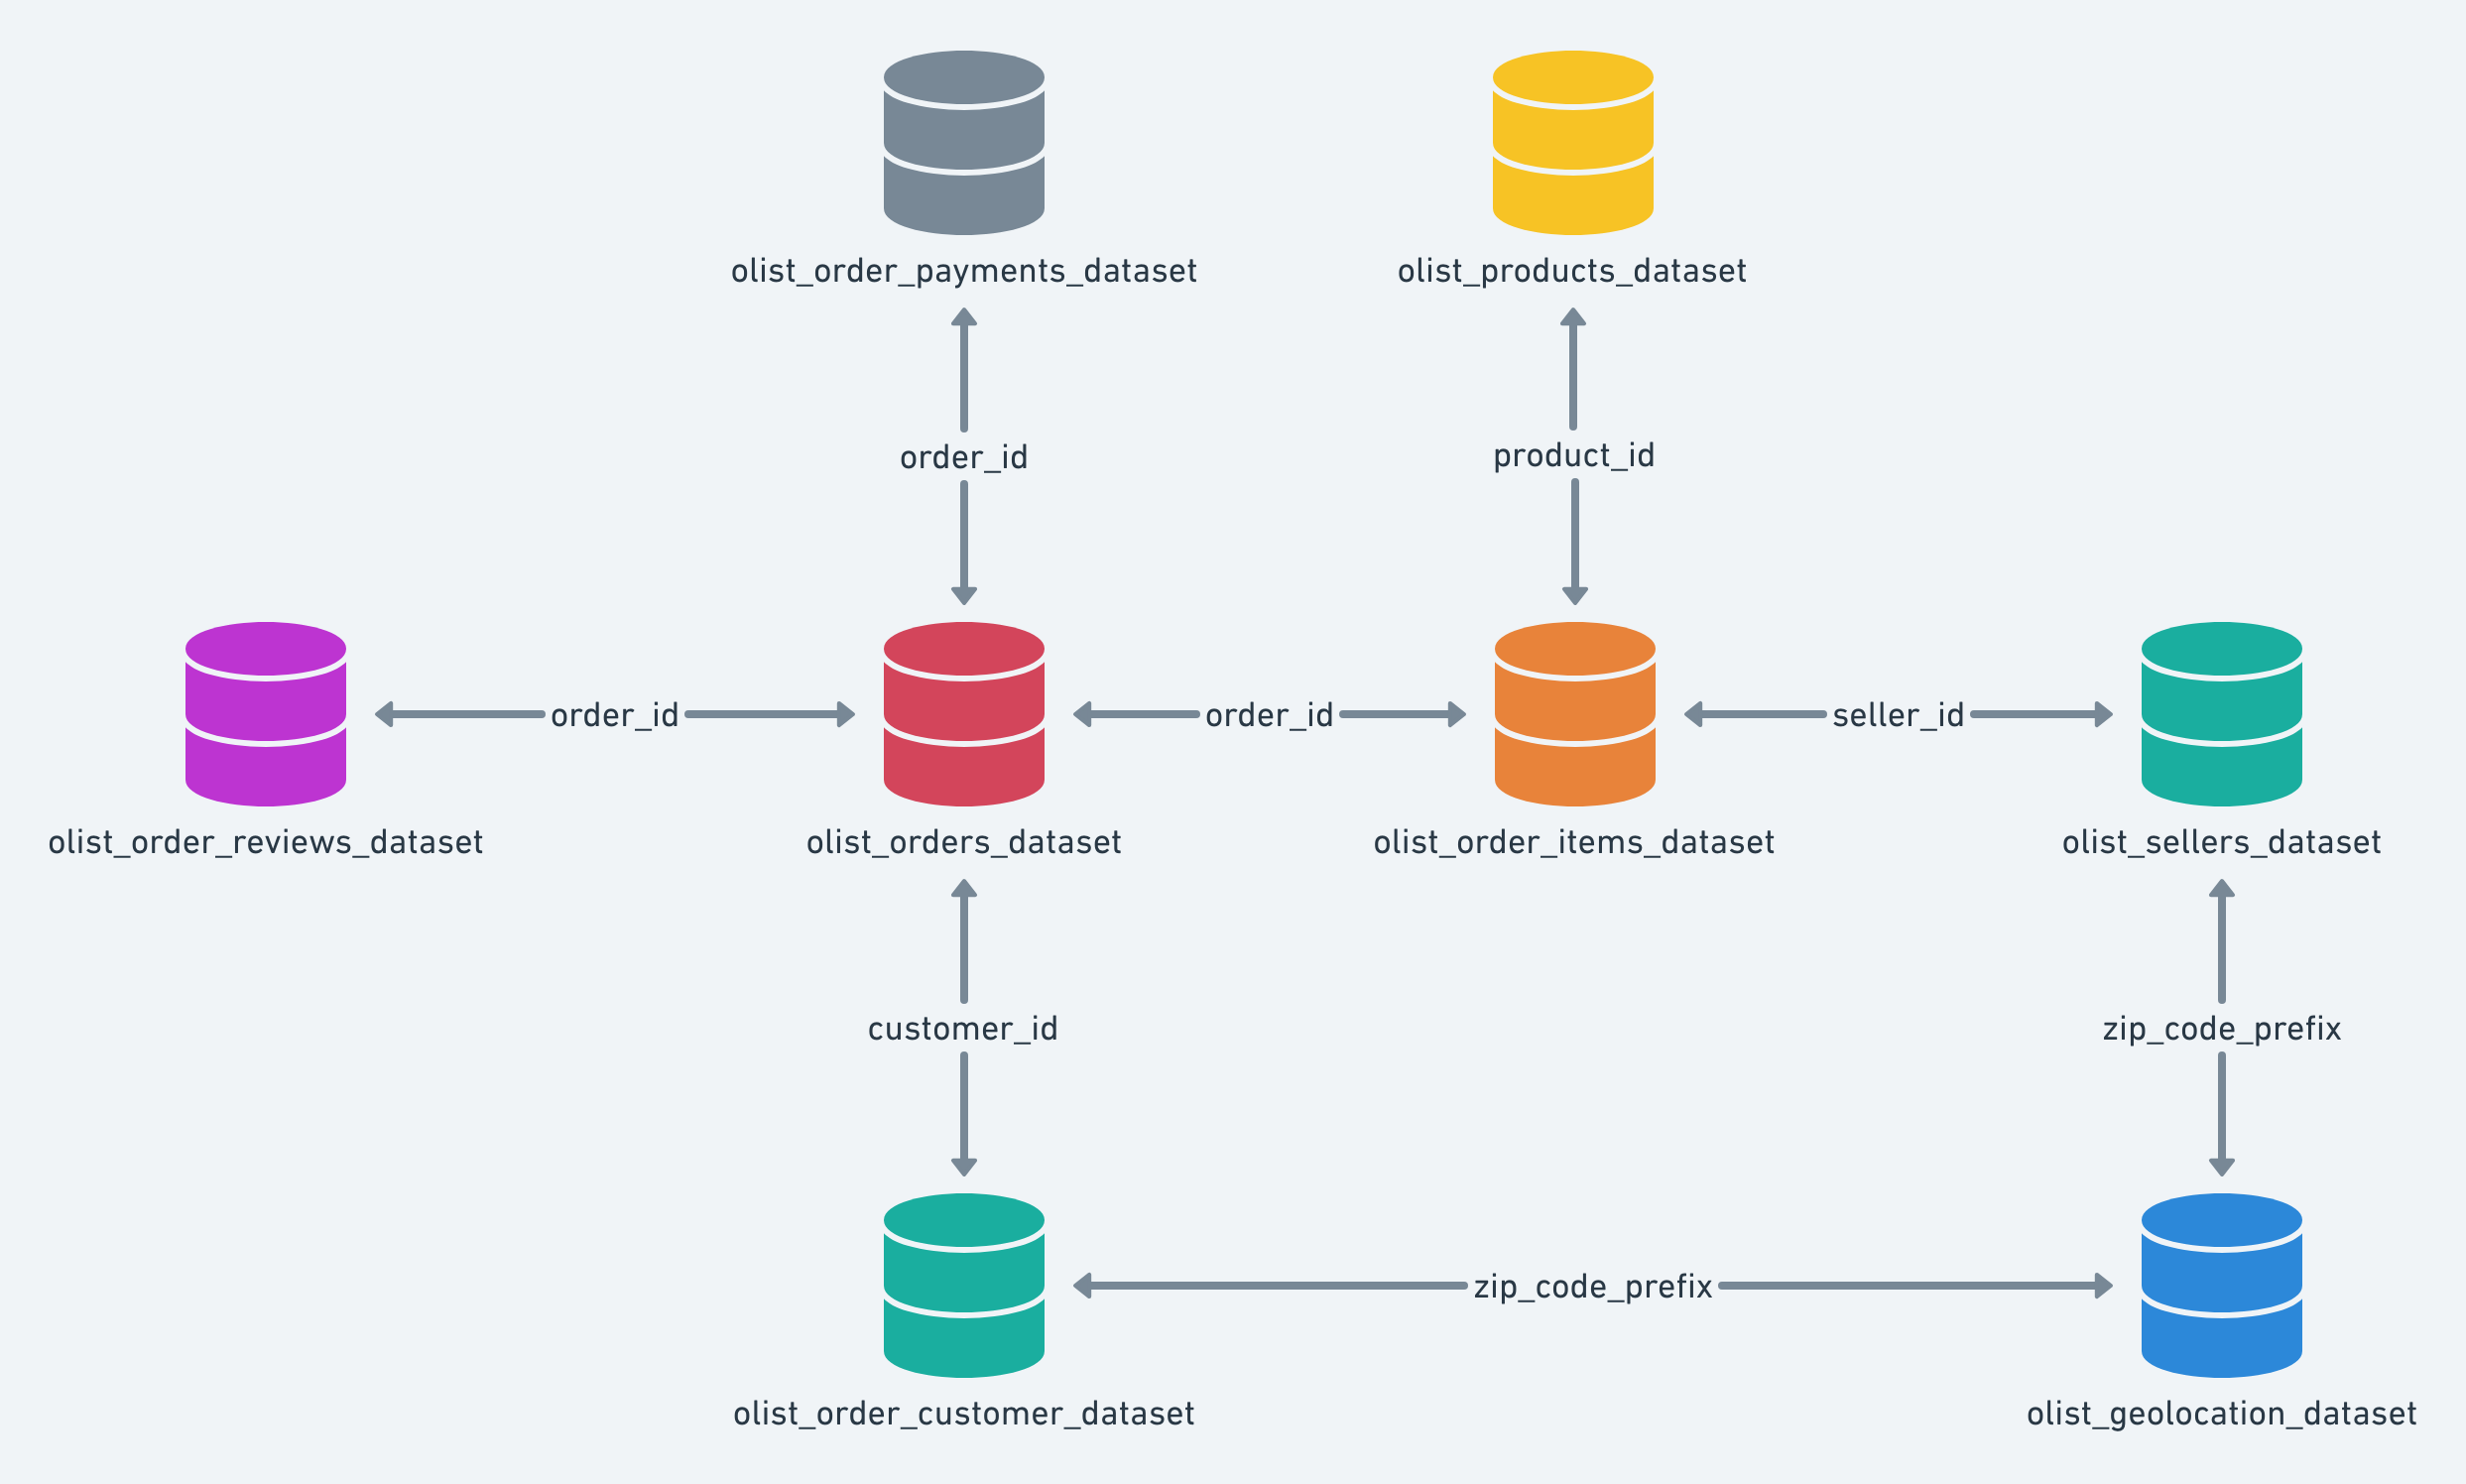
</div>


### Les bases de données commandes et articles

In [23]:
commandes.head(2)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00

In [24]:
articles.head(2)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93

Nous allons regrouper ces deux bases de données par la variable "order_id".

Cependant, plusieurs variables ne vont pas être pertinentes pour la suite de l'étude car elles sont liées à des comportements de la plateforme et non pas du client.

In [25]:
articles_commandes = df_articles_commandes(articles, commandes, clients, paiements, avis)

Pour ne conserver uniquement les clients ayant profité de leur commande, seuls les commandes dont le statut est 'delivered' ('livré') sont conservées.

Une des informations intéressantes commercialement de cette base de données est la variable "order_purchase_timestamp". Elle permet d'estimer le nombre de commandes d'articles du site par laps de temps. Par exemple, il est possible de calculer le nombre d'articles commandés par jour.

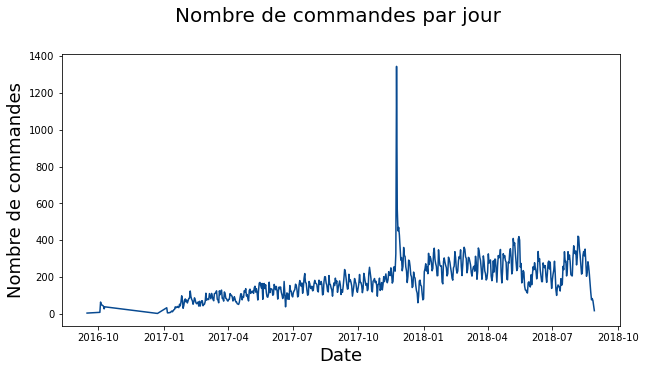

In [26]:
graph_com_par_jour(articles_commandes)

Il est possible d'observer un pic vers novembre/décembre 2017 et un plateau entre octobre 2016 et janvier 2017 . Y-a-il un mois particulier où le nombre de commandes est plus important que pour les autres périodes de l'année?

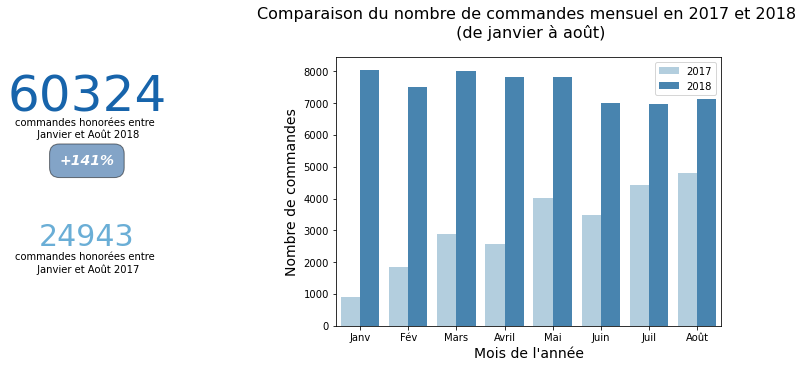

In [27]:
graph_annees(articles_commandes, 2017, 2018)

Nous créons une base de données qui ne contient que les dates qui nous intéressent pour visualiser ce pic d'activité.

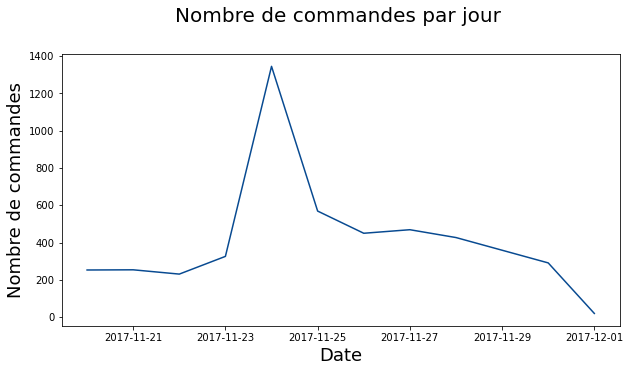

In [28]:
graph_cmd_zoom(articles_commandes, '2017-11-20 08:00:00', '2017-12-01 08:00:00')

Le pic se situe le vendredi 24 novembre 2017. Il correspond au Black Friday. C'est un jour très prisé au Brésil pour faire ses achats. En effet, ce jour là les commerçants proposent leurs invendus de l'année à des prix très intéressants, faisant de la place dans leur stock pour les articles proposés à la vente pour Noël. On voit bien sur ce graphique que Olist a vu ce jour le nombre de commande être multiplié par 5.

Cette méthode du choix des dates pour construire une base de données pourra s'avérer très utile quand il faudra déterminer la période d'actualisation d'une méthode de classification.

Regardons maintenant la répartition des commandes suivant les mois de l'année.

Pour obtenir les nombres de commandes et le chiffre d'affaires mensuel pour les deux années d'activités, une nouvelle base de données a été créée.

In [29]:
g = table_cmb_CA_mensuel(articles_commandes)

mois_annee  nb_com_mensuel  CA_mensuel
0     2016-09               1      134.97
1     2016-10             265    40325.11
2     2016-12               1       10.90
3     2017-01             750   111798.36
4     2017-02            1653   234223.40
5     2017-03            2546   359198.85
6     2017-04            2303   340669.68
7     2017-05            3546   489338.25
8     2017-06            3135   421923.37
9     2017-07            3872   481604.52
10    2017-08            4193   554699.70
11    2017-09            4150   607399.67
12    2017-10            4478   648247.65
13    2017-11            7289   987765.37
14    2017-12            5513   726033.19
15    2018-01            7069   924645.00
16    2018-02            6555   826437.13
17    2018-03            7003   953356.25
18    2018-04            6798   973534.09
19    2018-05            6749   977544.69
20    2018-06            6099   856077.86
21    2018-07            6159   867953.46
22    2018-08            6351   838576.64

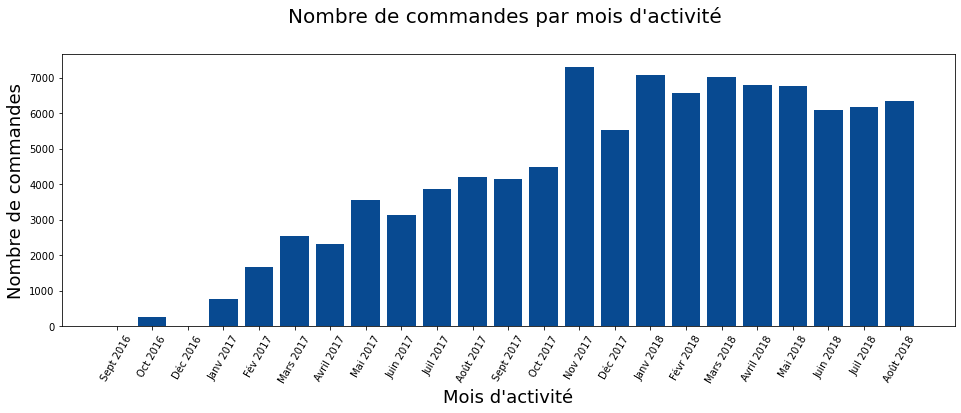

In [30]:
graph_activite_mensuel(g, choix='commandes')

Ici, il est possible de voir la croissance des nombres de commandes mois après mois. Encore une fois, le Black Friday a une forte influence sur le nombre de commandes mensuel.

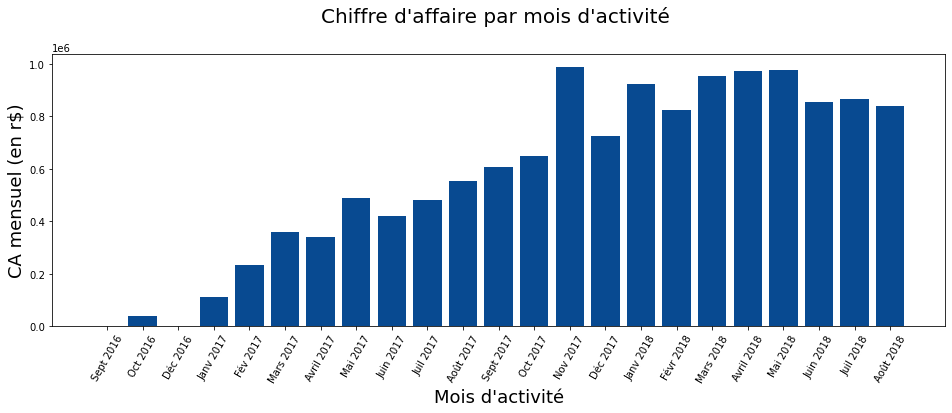

In [31]:
graph_activite_mensuel(g, choix='CA')

Le chiffre d'affaires mensuel observe une légère baisse sur les 3 derniers mois d'activité.

On peut aussi se demander quel jour de la semaine les commandes sont-elles les plus nombreuses.

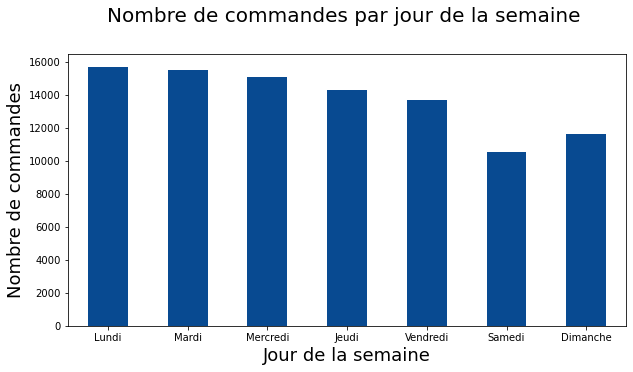

In [32]:
graph_jour_semaine(articles_commandes)

Les jours de la semaine de travail sont les jours où les commandes sont les plus nombreuses. Les jours de week-end ont l'air d'être consacrés à d'autres activités qu'aux commandes d'articles sur le site.
Pour cibler la campagne marketing personnalisée, il est important de diffuser les publicités au bon moment. Cela inclut l'heure de la journée. A quel moment de la journée le nombre de commande est-il le plus élevé? Est-ce le soir avant le coucher ou le midi lors de la pause déjeuner?

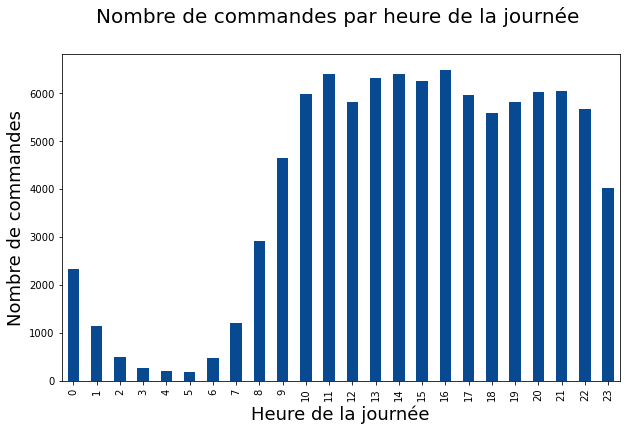

In [33]:
graph_heure_journee(articles_commandes)

Finalement, le nombre de commande se stabilise entre de 10h le matin et 22h le soir. 

Quand on regarde les variations dans leur ensemble (nombre de commandes par jour, par mois, par jour de la semaine et par heure), il est possible de remarquer que les plus grandes variations sont pour les commandes mensuelles. 

### La base de données articles_commandes et paiements

 La base de données des paiements donne deux informations :

* Le nombre de moyens de paiement différents utilisés pour une commande.
* Le nombre de versement pour une commande.

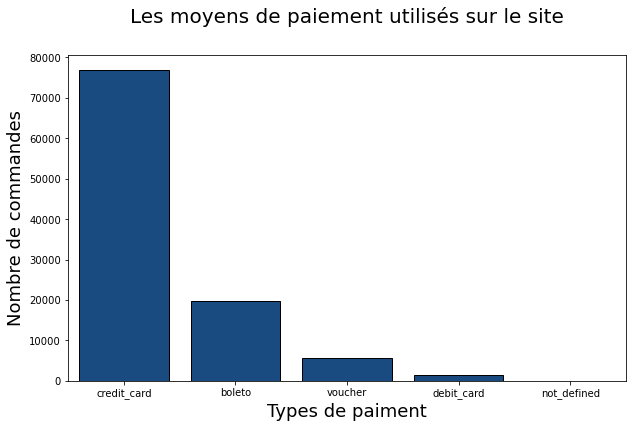

In [34]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.countplot(data=paiements,
              x="payment_type",
              edgecolor="black",
              color=a(0.9))
plt.title(f"Les moyens de paiement utilisés sur le site\n",
          fontsize=20,
          pad=10)
plt.xlabel("Types de paiment", fontsize=18)
plt.ylabel("Nombre de commandes", fontsize=18)
plt.show()

Le paiement par carte de crédit est le paiement le plus représenté dans la base de données. Puis c'est le boleto qui vient en second. C'est un moyen de paiement similaire à notre virement grâce au RIB. 

### Les bases de données articles_commandes et avis

Pour les avis clients, seule la variable contenant la note par produit acheté est conservée. Elle sera la moyenne des avis pour une commande.

La répartion des notes attribuées aux commandes est présentée par la représentation ci-dessous :

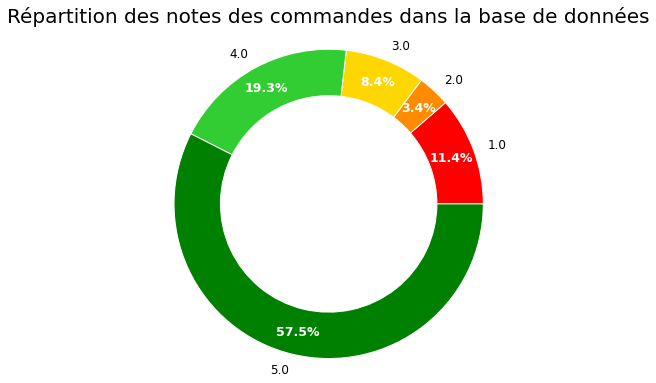

In [35]:
score_ring_inv(articles_commandes, 'review_score', 'Unknown')
plt.title("Répartition des notes des commandes dans la base de données",
          fontsize=20,
          pad=15)
plt.show()  # Affiche le graphique

La grande majorité des commandes ont été notées de façon très favorables.

### Les bases de données produits et catégories

In [36]:
categories_en.head(2)

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories

Les noms donnés dans la base de données categories_en sont équivalents pour les deux variables. L'un est la traduction de l'autre. Il suffit de garder la variable qui donne la catégorie de produits en anglais.

La base de données produits contient des renseignements sur les produits :
    - leur nom
    - leur catégorie
    - leur taille
    - leur poids etc ...
La jonction des deux bases de données permet de traduire la variable 'product_category_name'

In [37]:
produits = df_produits(produits, categories_en)

In [38]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
 8   product_category_name       32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


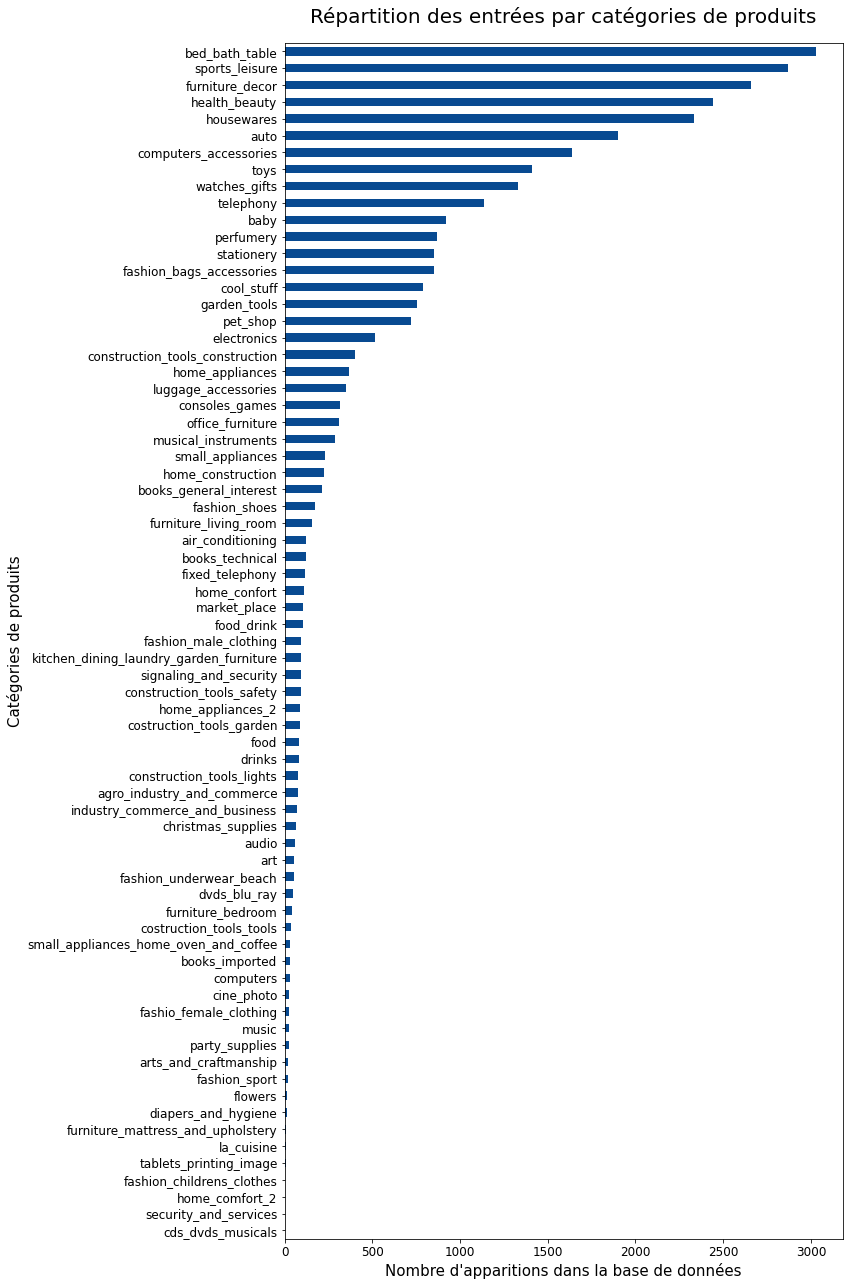

In [39]:
plt.rcParams["figure.figsize"] = (10, 22)
produits['product_category_name'].value_counts(ascending=True).plot(
    kind='barh', fontsize=12, color=a(0.9))
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.title("Répartition des entrées par catégories de produits",
          fontsize=20,
          pad=20)
plt.ylabel("Catégories de produits", fontsize=15)
plt.show()

Les produits les plus représentés dans la base de données sont les articles concernant la maison, les loisirs et le bien-être.

### Les bases de données articles_commandes et clients

La base de données articles_commandes est fusionnée avec la base de données clients suivant le code 'customer_id'.

In [40]:
articles_commandes.head(2)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id  price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.9          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.9          19.93   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   

  order_delivered_customer_date  nb_moyens_paiements  \
0           2017-09-20 23:43:48                  1.0   
1           2017-05-12 16:04:24                  1.0   

   tot_versements_paiements  review_score                customer_unique_id  \
0                       2.0           5.0  871766c5855e863f6eccc05f988b23cb   
1                       3.0           4.0  eb28e67c4c0b83846050ddfb8a35d051   

   customer_zip_code_prefix          customer_city customer_state  
0                     28013  campos dos goytacazes             RJ  
1                     15775        santa fe do sul             SP

### Les bases de données articles_commandes et produits

La base de données articles_commandes est fusionnée avec la base de données produits suivant le code 'product_id'.

In [41]:
df_groupe = pd.merge(articles_commandes, produits, how="left", on="product_id")
df_groupe.head(2)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id  price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61   58.9          13.29   
1  e5f2d52b802189ee658865ca93d83a8f  239.9          19.93   

                        customer_id order_status order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a    delivered      2017-09-13 08:59:02   
1  f6dd3ec061db4e3987629fe6b26e5cce    delivered      2017-04-26 10:53:06   

  order_delivered_customer_date  nb_moyens_paiements  ...  \
0           2017-09-20 23:43:48                  1.0  ...   
1           2017-05-12 16:04:24                  1.0  ...   

           customer_city  customer_state product_name_lenght  \
0  campos dos goytacazes              RJ                58.0   
1        santa fe do sul              SP                56.0   

   product_description_lenght product_photos_qty product_weight_g  \
0                       598.0                4.0            650.0   
1                       239.0                2.0          30000.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               28.0                9.0              14.0   
1               50.0               30.0              40.0   

   product_category_name  
0             cool_stuff  
1               pet_shop  

[2 rows x 24 columns]

## Création de nouvelles variables selon le comportement du client

Chaque client est identifié par la variable 'customer_unique_id'.

La variable 'order_delivered_customer_date' n'est utile que si elle est comparée à la variable 'order_purchase_timestamp'. Une nouvelle variable correspondant à la différence entre ces deux variables (et donc donnant le délai entre la commande et la livraison). La variable 'order_delivered_customer_date' peut être supprimée.

In [42]:
df = olist_nvl_variables(df_groupe)

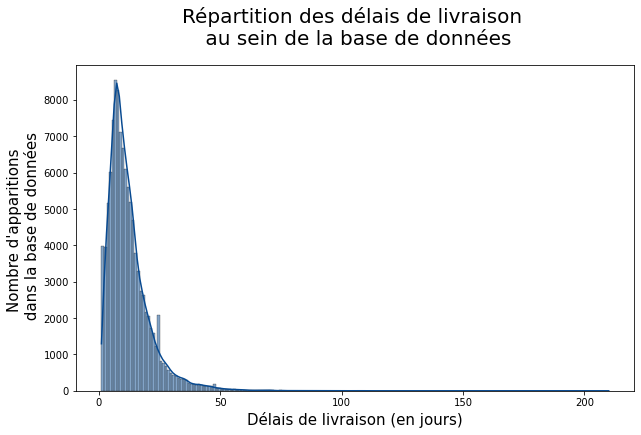

In [43]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.histplot(data=df,
             x="delai_livraison",
             stat="count",
             color=a(0.9),
             kde=True,
             bins=200)
plt.xlabel("Délais de livraison (en jours)", fontsize=15)
plt.ylabel("Nombre d'apparitions \n dans la base de données", fontsize=15)
plt.title(
    f"Répartition des délais de livraison \n au sein de la base de données",
    fontsize=20,
    pad=20)
plt.show()

Les catégories sont trop nombreuses pour que l'étape d'encodage qui suivra soit pertinente. Les catégories vont être regroupés sous des labels plus généraux:

    - Mode
    - Sport
    - Matériaux & Outils
    - Santé & Bien être
    - Enfants
    - Produits Culturels
    - Denrées alimentaires
    - Multimédia
    - Maison & Intérieur
    - Cadeaux
    - Autres

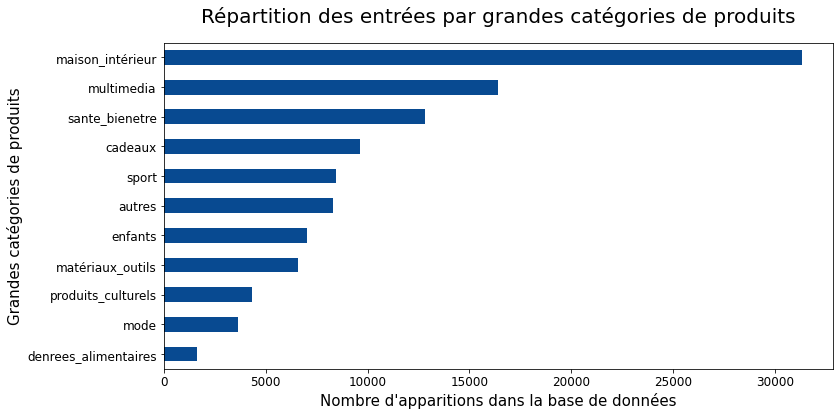

In [44]:
plt.rcParams["figure.figsize"] = (12, 6)
df['categorie_produit'].value_counts(ascending=True).plot(kind='barh',
                                                          fontsize=12,
                                                          color=a(0.9))
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.title("Répartition des entrées par grandes catégories de produits",
          fontsize=20,
          pad=20)
plt.ylabel("Grandes catégories de produits", fontsize=15)
plt.show()

Concernant le client il est possible de visualiser le nombre de commandes qu'il a passé sur le site.

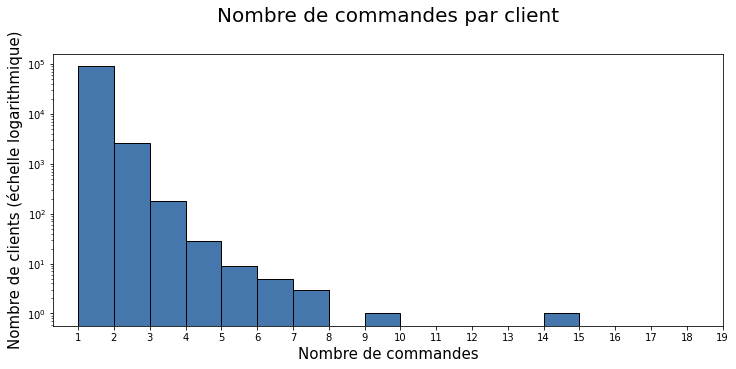

In [45]:
plt.rcParams["figure.figsize"] = (12, 5)

sns.histplot(df.groupby("customer_unique_id").agg({"order_id": "nunique"}), x="order_id", color=a(0.9), bins=14)
plt.xlabel("Nombre de commandes", fontsize=15)
plt.ylabel("Nombre de clients (échelle logarithmique)", fontsize=15)
plt.yscale('log')  # pour afficher le graphique à l'échelle logarithmique
plt.xticks(np.arange(1, 20))
plt.title(f"Nombre de commandes par client\n", fontsize=20, pad=10)
plt.show()

La très grande majorité des clients n'a passé qu'une seule commande.

Regardons combien de produits achètent les clients par commande.

In [46]:
produits_par_commande = prod_par_cmd(df)

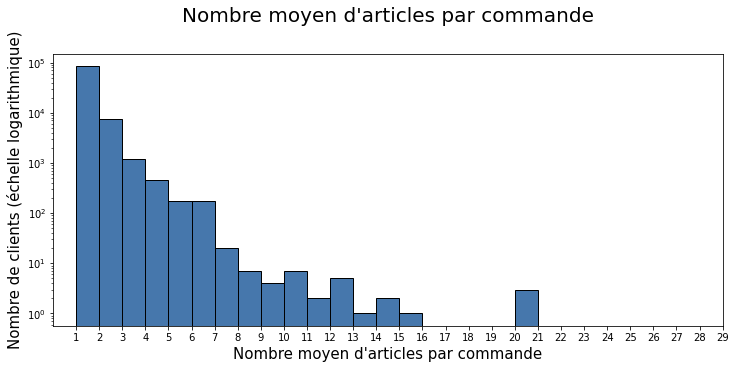

In [47]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.histplot(data=produits_par_commande,
             x="moy_nb_articles",
             color=a(0.9),
             bins=20)
plt.xlabel("Nombre moyen d'articles par commande", fontsize=15)
plt.ylabel("Nombre de clients (échelle logarithmique)", fontsize=15)
plt.xticks(np.arange(1, 30))
plt.yscale('log')  # pour afficher le graphique à l'échelle logarithmique
plt.title("Nombre moyen d'articles par commande\n", fontsize=20, pad=10)
plt.show()

La grande majorité des clients n'achètent qu'un seul article par commande.

 Pour avoir une idée de l'impact achat suivant leur catégorie, une variable par catégorie de produits est créer. Chacune représente le ratio des produits de la catégories sur le nombre total d'articles.

In [48]:
categories_clients = df_categories_clients(df)
categories_clients.head(2)

categorie_produit                customer_unique_id  autres  cadeaux  \
0                  0000366f3b9a7992bf8c76cfdf3221e2     0.0      0.0   
1                  0000b849f77a49e4a4ce2b2a4ca5be3f     0.0      0.0   

categorie_produit  denrees_alimentaires  enfants  maison_intérieur  \
0                                   0.0      0.0               1.0   
1                                   0.0      0.0               0.0   

categorie_produit  matériaux_outils  mode  multimedia  produits_culturels  \
0                               0.0   0.0         0.0                 0.0   
1                               0.0   0.0         0.0                 0.0   

categorie_produit  sante_bienetre  sport  total_articles  
0                             0.0    0.0             1.0  
1                             1.0    0.0             1.0

In [49]:
categories_clients['total_articles'].unique()

array([ 1.,  2.,  4.,  3.,  7.,  5.,  6., 12., 10.,  8., 18., 15.,  9.,
       14., 11., 21., 20., 13., 24.])

### La base de données clients complétée

Il s'agit maintenant de regrouper toutes les bases de données au sein d'une seule qui résume le comportement et les informations de chaque client.

In [50]:
clients

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

Cette base de données synthétique nous permet de définir de nouvelles variables :

* le total des achats et des frais de port
* le ratio fret / total de la commande
* le prix moyen par commande
* le prix moyen par article

Nous allons ajouter une dernière variable de temps : le nombre de jours depuis la dernière commande. Cette variable évaluera l'aspect récent de la commande, très utile pour l'analyse RFM.

In [51]:
df = regroupement_df(df, categories_clients, produits_par_commande, clients)

In [52]:
df = df_rfm(df)

la variable moy_nb_moyens_paiements a ses valeurs manquantes remplacées par la valeur :  1.0
la variable moy_tot_versements_paiements a ses valeurs manquantes remplacées par la valeur :  1.0
la variable moy_review_score a ses valeurs manquantes remplacées par la valeur :  5.0
la variable moy_delai_livraison a ses valeurs manquantes remplacées par la valeur :  7.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_commandes                  93358 non-null  int64  
 2   total_depense                 93358 non-null  float64
 3   moy_nb_moyens_paiements       93358 non-null  float64
 4   moy_tot_versements_paiements  93358 non-null  float64
 5   moy_review_score              93358 non-null  float64
 6   moy_delai_livraison           93358 non-null  float64
 7   autres                        93358 non-null  float64
 8   cadeaux                       93358 non-null  float64
 9   denrees_alimentaires          93358 non-null  float64
 10  enfants                       93358 non-null  float64
 11  maison_intérieur              93358 non-null  float64
 12  matériaux_outils              93358 non-null  float64
 13  m

### Les données de géolocalisation

In [54]:
df["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'AP', 'RO', 'RR'], dtype=object)

Pour que les localisations par état soient davantage explicites, une colonne de la correspondance avec le nom entier des états est ajoutée d'après une page Wikipedia.

In [55]:
wikipedia = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"

In [56]:
df = df_geoloc_olist(df, wikipedia)

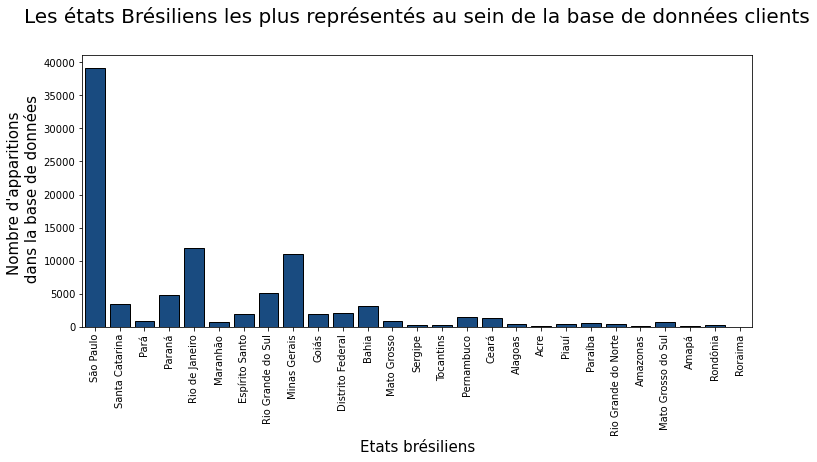

In [57]:
plt.rcParams["figure.figsize"] = (12, 5)
sns.countplot(data=df, x="Etat_geo_client", edgecolor="black", color=a(0.9))
plt.xticks(range(0, df["Etat_geo_client"].nunique()),
           df["Etat_geo_client"].unique(),
           rotation=90)
plt.xlabel("Etats brésiliens", fontsize=15)
plt.ylabel("Nombre d'apparitions \n dans la base de données", fontsize=15)
plt.title(
    f"Les états Brésiliens les plus représentés au sein de la base de données clients\n",
    fontsize=20,
    pad=10)
plt.show()

Il est intéressant de regarder la répartition des montants des commandes par état pour voir s'il y a des disparités.

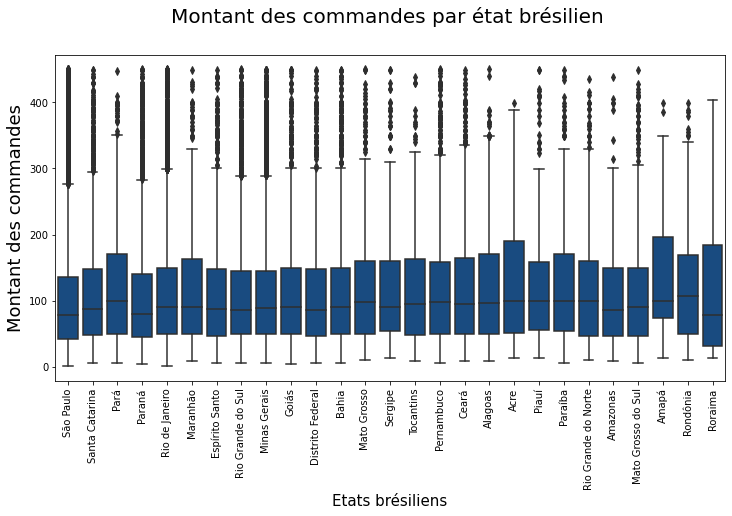

In [58]:
plt.rcParams["figure.figsize"] = (12, 6)
sns.boxplot(data=df[df["total_depense"] < 450],
            x="Etat_geo_client",
            y="total_depense",
            color=a(0.9))
plt.title(f"Montant des commandes par état brésilien \n", fontsize=20, pad=10)
plt.xticks(rotation=90)
plt.xlabel("Etats brésiliens", fontsize=15)
plt.ylabel("Montant des commandes", fontsize=18)
plt.show()

Nous allons transformer la variable qualitative 'geolocation_state' en variable quantitative. Pour cela, on calcule la distance de Haversine entre l'état du client et l'état le plus représenté dans la base de données : l'état de São Paulo.

In [59]:
# São Paulo (source =
# https://geohack.toolforge.org/geohack.php?pagename=S%C3%A3o_Paulo&params
# =23_33_01_S_46_38_02_W_type:city_region:BR)
sp_lat = -23.550278
sp_lon = -46.633889

In [60]:
geoloc['d_harv'] = [
    d_harv(sp_lat, sp_lon, x, y)
    for x, y in zip(geoloc.geolocation_lat, geoloc.geolocation_lng)
]

geo = geoloc.groupby(geoloc["geolocation_zip_code_prefix"]).mean()
geo = geo.reset_index()

geo.head(2)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng    d_harv
0                         1001       -23.550190       -46.634024  0.077050
1                         1002       -23.548146       -46.634979  0.273866

Avant de fusionner cette base de données avec la base de données clients, il faut vérifier que tous les code postaux présents dans la base de données clients sont dans la base de données geo.

In [61]:
df = df_zip_code(df,geo)

In [62]:
df.head(2)

customer_unique_id  nb_commandes  total_depense  \
0  0000366f3b9a7992bf8c76cfdf3221e2             1          129.9   
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1           18.9   

   moy_nb_moyens_paiements  moy_tot_versements_paiements  moy_review_score  \
0                      1.0                           8.0               5.0   
1                      1.0                           1.0               4.0   

   moy_delai_livraison  autres  cadeaux  denrees_alimentaires  ...  \
0                  6.0     0.0      0.0                   0.0  ...   
1                  3.0     0.0      0.0                   0.0  ...   

   freight_ratio  moy_prix_commande  moy_prix_article  \
0           0.08              129.9             129.9   
1           0.30               18.9              18.9   

   customer_zip_code_prefix  customer_city  j_derniere_commande  \
0                      7787        cajamar                  111   
1                      6053         osasco                  114   

   Etat_geo_client  geolocation_lat  geolocation_lng     d_harv  
0        São Paulo       -23.340235       -46.830140  30.784607  
1        São Paulo       -23.559115       -46.787626  15.709783  

[2 rows x 31 columns]

## Visualisation des clients sur la carte du Brésil

In [63]:
visualisation_folium(df,sp_lat, sp_lon)

# Export du dataset final pour classification non-supervisée

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93103 entries, 0 to 93102
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93103 non-null  object 
 1   nb_commandes                  93103 non-null  int64  
 2   total_depense                 93103 non-null  float64
 3   moy_nb_moyens_paiements       93103 non-null  float64
 4   moy_tot_versements_paiements  93103 non-null  float64
 5   moy_review_score              93103 non-null  float64
 6   moy_delai_livraison           93103 non-null  float64
 7   autres                        93103 non-null  float64
 8   cadeaux                       93103 non-null  float64
 9   denrees_alimentaires          93103 non-null  float64
 10  enfants                       93103 non-null  float64
 11  maison_intérieur              93103 non-null  float64
 12  matériaux_outils              93103 non-null  float64
 13  m

La base de données a été nettoyée et préparée pour les tests de classification non-supervisée. Elle a été débarassée des variables non pertinentes et de nouvelles variables ont été créées.Les valeurs manquantes ont été imputées. La base de données résultant de tout ce travail est maintenant claire et pertinente pour une étude de classification.